# Kaggle Challenge : Facebook Recruiting IV: Human or Robot?

####Description of the Challenge
Predict if an online bid is made by a machine or a human

Ever wonder what it's like to work at Facebook? Facebook and Kaggle are launching an Engineering competition for 2015. Trail blaze your way to the top of the leader board to earn an opportunity at interviewing for a role as a software engineer, working on world class Machine Learning problems. 

In this competition, you'll be chasing down robots for an online auction site. Human bidders on the site are becoming increasingly frustrated with their inability to win auctions vs. their software-controlled counterparts. As a result, usage from the site's core customer base is plummeting.



In order to rebuild customer happiness, the site owners need to eliminate computer generated bidding from their auctions. Their attempt at building a model to identify these bids using behavioral data, including bid frequency over short periods of time, has proven insufficient. 

The goal of this competition is to identify online auction bids that are placed by "robots", helping the site owners easily flag these users for removal from their site to prevent unfair auction activity. 

The data in this competition comes from an online platform, not from Facebook.


### Loading Data with pandas

In [1]:
import pandas as pd
import numpy as np

#loading data

data = pd.read_csv('input/bids.csv')
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [2]:
data.head(5)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


##Features Creation

### number of actions by users : 
*counts in the bids dataframes*

In [3]:
dataIdList =  data['bidder_id'].unique()
groupedData = data[['bidder_id','auction']].groupby('bidder_id').count()['auction']
def numberofActions(line,dataGrouped,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return dataGrouped[line['bidder_id']]
    
train['nbActions'] = train.apply(lambda x: numberofActions(x,groupedData,dataIdList),axis=1)
test['nbActions'] = test.apply(lambda x: numberofActions(x,groupedData,dataIdList),axis=1)

###First Action and last
to be done

### Time Response
*timing between the last bid and the action of the user on an auction*
 - mean Time response
 - min Time response
 - max Time response

In [4]:
lastActionDict={}

def timeResponse(line,lastActionDict):
    if line['auction'] in lastActionDict:
        time = line['time'] - lastActionDict[line['auction']]
        lastActionDict[line['auction']] = line['time']
        return time
    else :
        lastActionDict[line['auction']] = line['time']
        return 0

data['timeresponse'] = data.apply(lambda x: timeResponse(x,lastActionDict),axis=1)

In [5]:
groupedData = data[['bidder_id','timeresponse']].groupby('bidder_id').mean()['timeresponse']
def meanTimeResponse(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]
    
train['meanTimeResponse'] = train.apply(lambda x: meanTimeResponse(x,groupedData,dataIdList),axis=1)
test['meanTimeResponse'] = test.apply(lambda x: meanTimeResponse(x,groupedData,dataIdList),axis=1)

groupedData = data[['bidder_id','timeresponse']].groupby('bidder_id').min()['timeresponse']
def minTimeResponse(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]
    
train['minTimeResponse'] = train.apply(lambda x: minTimeResponse(x,groupedData,dataIdList),axis=1)
test['minTimeResponse'] = test.apply(lambda x: minTimeResponse(x,groupedData,dataIdList),axis=1)

groupedData = data[['bidder_id','timeresponse']].groupby('bidder_id').max()['timeresponse']
def maxTimeResponse(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]
    
train['maxTimeResponse'] = train.apply(lambda x: maxTimeResponse(x,groupedData,dataIdList),axis=1)
test['maxTimeResponse'] = test.apply(lambda x: maxTimeResponse(x,groupedData,dataIdList),axis=1)

### Bid Value
*number of bids before the action of the user on an auction*
 - mean bid value
 - min bid value
 - max bid value

In [6]:
lastActionDict={}

def bidValue(line,lastActionDict):
    if line['auction'] in lastActionDict:
        lastActionDict[line['auction']] += 1
    else :
        lastActionDict[line['auction']] = 1
    return lastActionDict[line['auction']]

data['bidValue'] = data.apply(lambda x: bidValue(x,lastActionDict),axis=1)

In [7]:
groupedData = data[['bidder_id','bidValue']].groupby('bidder_id').mean()['bidValue']
def meanbidValue(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]
    
train['meanBidValue'] = train.apply(lambda x: meanbidValue(x,groupedData,dataIdList),axis=1)
test['meanBidValue'] = test.apply(lambda x: meanbidValue(x,groupedData,dataIdList),axis=1)

groupedData = data[['bidder_id','bidValue']].groupby('bidder_id').min()['bidValue']
def minbidValue(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]
    
train['minBidValue'] = train.apply(lambda x: minbidValue(x,groupedData,dataIdList),axis=1)
test['minBidValue'] = test.apply(lambda x: minbidValue(x,groupedData,dataIdList),axis=1)

groupedData = data[['bidder_id','bidValue']].groupby('bidder_id').max()['bidValue']
def maxbidValue(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]
    
train['maxBidValue'] = train.apply(lambda x: maxbidValue(x,groupedData,dataIdList),axis=1)
test['maxBidValue'] = test.apply(lambda x: maxbidValue(x,groupedData,dataIdList),axis=1)

### Auction played and won
*estimation of the winner by the last action and finding the number of auction played by users*
- number of auctions played
- number of auctions won

In [8]:
dataUnique = data[['bidder_id','auction']].drop_duplicates()
groupedData = dataUnique.groupby('bidder_id').count()['auction']

def numberofAuctions(line,dataGrouped,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return dataGrouped[line['bidder_id']]
    
train['nbAuctionsPlayed'] = train.apply(lambda x: numberofAuctions(x,groupedData,dataIdList),axis=1)
test['nbAuctionsPlayed'] = test.apply(lambda x: numberofAuctions(x,groupedData,dataIdList),axis=1)

In [9]:
def last(line,lastActionDict):
    if line['bidValue'] == lastActionDict[line['auction']] :
        return True
    else :
        return False

data['end'] = data.apply(lambda x: last(x,lastActionDict),axis=1)

In [10]:
winner = data[data['end']].groupby('bidder_id').count()['auction']

def nbOfAuctionWon(line,winner):
    if not line['bidder_id'] in winner:
        return 0
    else:
        return winner[line['bidder_id']]
    
train['nbOfAuctionWon'] = train.apply(lambda x: nbOfAuctionWon(x,winner),axis=1)
test['nbOfAuctionWon'] = test.apply(lambda x: nbOfAuctionWon(x,winner),axis=1)

### nb of Ip address , country, url, phone
*not really interesting*

In [11]:
nboftriple = data[['bidder_id','ip','country','url']].drop_duplicates().groupby('bidder_id').count()['ip']

def nbOfTriple(line,nboftriple):
    if not line['bidder_id'] in nboftriple:
        return 0
    else:
        return nboftriple[line['bidder_id']]
    
train['nbOfTriple'] = train.apply(lambda x: nbOfTriple(x,nboftriple),axis=1)
test['nbOfTriple'] = test.apply(lambda x: nbOfTriple(x,nboftriple),axis=1)

### Create Time Series for each user 
*creating bin for estimation of time step, then creation of a time series by users*
- Fast Fourier Transform
- Wavelet RMS
- Median
- Max

In [20]:
time = data['time'].unique()
time.sort()
pas = int(np.floor((time[-1]-time[0])/8000)-1)

def calculateTime(line,time,pas):
    return (line['time'] - time[0])/ pas
    
data['timeSteps'] = data.apply(lambda x: calculateTime(x,time,pas),axis=1)

In [22]:
data_time_series2 = data[['bidder_id','timeSteps','auction']].groupby(['bidder_id','timeSteps']).count()['auction'].unstack()
data_time_series2 = data_time_series2.fillna(0)
data_time_series2.head(5)

timeSteps,0,1,2,3,4,5,6,7,8,9,...,7991,7992,7993,7994,7995,7996,7997,7998,7999,8000
bidder_id,,,,,,,,,,,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002d229ffb247009810828f648afc2ef593rb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0030a2dd87ad2733e0873062e4f83954mkj86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00486a11dff552c4bd7696265724ff81yeo9v,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
time_Series = data_time_series2.columns
times_Series1 = time_Series[time_Series<=1000]
times_Series2 = time_Series[time_Series>1000]
times_Series21 = times_Series2[times_Series2<=6000]
times_Series22 = times_Series2[times_Series2>6000]

print times_Series1[0] ,times_Series1[-1] , times_Series1.shape
print times_Series21[0] ,times_Series21[-1] , times_Series21.shape
print times_Series22[0] ,times_Series22[-1] , times_Series22.shape

0 774 (775,)
3612 4387 (776,)
7225 8000 (776,)


In [24]:
time_group1 = data_time_series2.ix[:,0:775]
time_group2 = data_time_series2.ix[:,3612:4387]
time_group3 = data_time_series2.ix[:,7225:8000]
time_group2.head(5)

timeSteps,3612,3613,3614,3615,3616,3617,3618,3619,3620,3621,...,4378,4379,4380,4381,4382,4383,4384,4385,4386,4387
bidder_id,,,,,,,,,,,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002d229ffb247009810828f648afc2ef593rb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0030a2dd87ad2733e0873062e4f83954mkj86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00486a11dff552c4bd7696265724ff81yeo9v,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


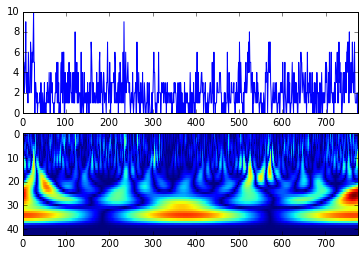

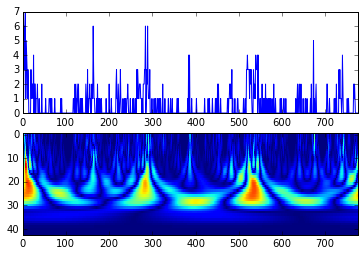

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import mlpy.wavelet as wave
x = time_group1.ix[u'3d7cff3dedd8a8e02dbc551c6a61da3bibbvh']
scales = wave.autoscales(N=x.shape[0], dt=1, dj=0.25, wf='dog', p=2)
X = wave.cwt(x=x, dt=1, scales=scales, wf='dog', p=2)
fig = plt.figure(1)
ax1 = plt.subplot(2,1,1)
p1 = ax1.plot(x)
ax1.autoscale_view(tight=True)
ax2 = plt.subplot(2,1,2)
p2 = ax2.imshow(np.abs(X), interpolation='nearest',aspect='auto')
plt.show()
x = time_group3.ix[u'585e7c21b80baf2225224fe140cdb1a73ddrf']
scales = wave.autoscales(N=x.shape[0], dt=1, dj=0.25, wf='dog', p=2)
X = wave.cwt(x=x, dt=1, scales=scales, wf='dog', p=2)
fig = plt.figure(1)
ax1 = plt.subplot(2,1,1)
p1 = ax1.plot(x)
ax1.autoscale_view(tight=True)
ax2 = plt.subplot(2,1,2)
p2 = ax2.imshow(np.abs(X), interpolation='nearest',aspect='auto')
plt.show()


In [26]:

import pywt as pywt

def extractRMSVWavelet(signal,waveFamily):
	C = pywt.wavedec(signal,waveFamily,mode='sym',level=5)
	RMS = np.array([np.sqrt(np.linalg.norm(wave)**2/(len(wave)-1)) for wave in C])
 	return RMS

def extractRMS(line,timeg1,timeg2,timeg3,dataid):
    if line in dataid:
        n1 = timeg1.ix[line].sum()
        n2 = timeg2.ix[line].sum()
        n3 = timeg3.ix[line].sum()
        if n1 > (n2 + n3):
            return extractRMSVWavelet(timeg1.ix[line],'db7')
        elif n2 >= (n1 + n3):
            return extractRMSVWavelet(timeg2.ix[line],'db7')
        else :
            return extractRMSVWavelet(timeg3.ix[line],'db7')
    else:
        return np.array([0.,0.,0.,0.,0.,0.])

colum = train['bidder_id'].apply(lambda x: extractRMS(x,time_group1 ,time_group2 ,time_group3,dataIdList))
columtest = test['bidder_id'].apply(lambda x: extractRMS(x,time_group1 ,time_group2 ,time_group3,dataIdList))

In [27]:
colum2 = np.zeros((2013,6))
for i in range(2013):
    colum2[i]=colum[i]
for i in range(6):
    train['res'+str(i)] = colum2[:,i]
    
colum2 = np.zeros((columtest.shape[0],6))
for i in range(columtest.shape[0]):
    colum2[i]=columtest[i]
for i in range(6):
    test['res'+str(i)] = colum2[:,i]

In [28]:
from numpy.fft import fft

def FFT(X,Band,Fs):

    C = fft(X)
    C = np.abs(C)
    Power =np.zeros(len(Band)-1);
    absPowers = np.zeros(len(Band)-1);
    Amp = np.zeros(len(Band)-1);
    STD = np.zeros(len(Band)-1);
    for Freq_Index in xrange(0,len(Band)-1):
        Freq = float(Band[Freq_Index])
        Next_Freq = float(Band[Freq_Index+1])
        Power[Freq_Index] = np.sum(C[np.floor(Freq/Fs*len(X)):np.floor(Next_Freq/Fs*len(X))])
        absPowers[Freq_Index] = (np.linalg.norm(C[np.floor(Freq/Fs*len(X)):np.floor(Next_Freq/Fs*len(X))])**2)/len(C[np.floor(Freq/Fs*len(X)):np.floor(Next_Freq/Fs*len(X))])
        Amp[Freq_Index] = np.max(C[np.floor(Freq/Fs*len(X)):np.floor(Next_Freq/Fs*len(X))])
        STD[Freq_Index] = np.std(C[np.floor(Freq/Fs*len(X)):np.floor(Next_Freq/Fs*len(X))])
    Power_Ratio = Power/np.sum(Power)
    absPowers_Ratio = absPowers/np.sum(absPowers)
    Amp_Ratio = Amp/np.sum(Amp)
    STD_Ratio = STD/np.sum(STD)

    return np.concatenate([[np.sum(Power)],Power_Ratio])#,Amp,Amp_Ratio,STD,STD_Ratio,absPowers,absPowers_Ratio

def extractFFT(line,timeg1,timeg2,timeg3,dataid):
    if line in dataid:
        Band = [0,5,10,20,30,50] 
        n1 = timeg1.ix[line].sum()
        n2 = timeg2.ix[line].sum()
        n3 = timeg3.ix[line].sum()
        if n1 > (n2 + n3):
            return FFT(timeg1.ix[line],Band,150)
        elif n2 >= (n1 + n3):
            return FFT(timeg2.ix[line],Band,150)
        else :
            return FFT(timeg3.ix[line],Band,150)
    else:
        return np.array([0.,0.,0.,0.,0.,0.])

colum = train['bidder_id'].apply(lambda x: extractFFT(x,time_group1 ,time_group2 ,time_group3,dataIdList))
columtest = test['bidder_id'].apply(lambda x: extractFFT(x,time_group1 ,time_group2 ,time_group3,dataIdList))

In [29]:
colum2 = np.zeros((2013,6))
for i in range(2013):
    colum2[i]=colum[i]
for i in range(6):
    train['fftPower'+str(i)] = colum2[:,i]
    
colum2 = np.zeros((columtest.shape[0],6))
for i in range(columtest.shape[0]):
    colum2[i]=columtest[i]
for i in range(6):
    test['fftPower'+str(i)] = colum2[:,i]

In [30]:
def median2(line,timeg1,timeg2,timeg3,dataid):
    if line in dataid:
        n1 = timeg1.ix[line].sum()
        n2 = timeg2.ix[line].sum()
        n3 = timeg3.ix[line].sum()
        if n1 > (n2 + n3):
            return timeg1.ix[line].median()
        elif n2 >= (n1 + n3):
            return timeg2.ix[line].median()
        else :
            return timeg3.ix[line].median()
    else:
        return 0

train['median'] = train['bidder_id'].apply(lambda x: median2(x,time_group1 ,time_group2 ,time_group3,dataIdList))
test['median'] = test['bidder_id'].apply(lambda x: median2(x,time_group1 ,time_group2 ,time_group3,dataIdList))

In [31]:
def max2(line,timeg1,timeg2,timeg3,dataid):
    if line in dataid:
        n1 = timeg1.ix[line].sum()
        n2 = timeg2.ix[line].sum()
        n3 = timeg3.ix[line].sum()
        if n1 > (n2 + n3):
            return timeg1.ix[line].max()
        elif n2 >= (n1 + n3):
            return timeg2.ix[line].max()
        else :
            return timeg3.ix[line].max()
    else:
        return 0

train['max'] = train['bidder_id'].apply(lambda x: max2(x,time_group1 ,time_group2 ,time_group3,dataIdList))
test['max'] = test['bidder_id'].apply(lambda x: max2(x,time_group1 ,time_group2 ,time_group3,dataIdList))

TO DO : try to see the time series for action to determine robot activity in it

In [78]:
data_time_series = data[['bidder_id','timeSteps','auction']].drop_duplicates().groupby(['auction','timeSteps']).count()['bidder_id'].unstack()
data_time_series = data_time_series.fillna(0)

time_group1 = data_time_series.ix[:,0:775]
time_group2 = data_time_series.ix[:,3612:4387]
time_group3 = data_time_series.ix[:,7225:8000]
time_group2.head(5)

timeSteps,3612,3613,3614,3615,3616,3617,3618,3619,3620,3621,...,4378,4379,4380,4381,4382,4383,4384,4385,4386,4387
auction,,,,,,,,,,,,,,,,,,,,,
00270,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,1,0
008vv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00cwr,0,0,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00do0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00hjy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Merchandise
- Merchandise buy by users

In [32]:
data['merchandise'].unique()

dicti = {'jewelry':0, 'furniture':1, 'home goods':2, 'mobile':3, 'sporting goods':4,
       'office equipment':5, 'computers':6, 'books and music':7, 'clothing':8,
       'auto parts':9}

train[['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods',
       'office equipment', 'computers', 'books and music', 'clothing',
       'auto parts']] = pd.DataFrame(np.zeros((train.shape[0],10)),columns=['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods',
       'office equipment', 'computers', 'books and music', 'clothing',
       'auto parts'])

test[['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods',
       'office equipment', 'computers', 'books and music', 'clothing',
       'auto parts']] = pd.DataFrame(np.zeros((train.shape[0],10)),columns=['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods',
       'office equipment', 'computers', 'books and music', 'clothing',
       'auto parts'])

grouped = data[['bidder_id','merchandise']].drop_duplicates()
def findMerchandise(line,grouped,dicti,dataid):
    res = np.zeros(10)
    if line in dataid:
        merch = np.array(grouped[grouped['bidder_id']==line]['merchandise'])[0]
        res[dicti[merch]] = 1
    return tuple(res)

In [33]:
res = train['bidder_id'].map(lambda x: findMerchandise(x,grouped,dicti,dataIdList))
(train['jewelry'], train['furniture'], train['home goods'], 
 train['mobile'], train['sporting goods'],train['office equipment'], 
 train['computers'], train['books and music'], train['clothing'],train['auto parts']) = zip(*res)

In [34]:
res = test['bidder_id'].map(lambda x: findMerchandise(x,grouped,dicti,dataIdList))
(test['jewelry'], test['furniture'], test['home goods'], 
 test['mobile'], test['sporting goods'],test['office equipment'], 
 test['computers'], test['books and music'], test['clothing'],test['auto parts']) = zip(*res)

### country
- number of country used by user

In [35]:
nbcountry=data[['bidder_id','country']].drop_duplicates().groupby('bidder_id').count()['country']
def country(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]

train['nbCountry'] = train.apply(lambda x: country(x,nbcountry,dataIdList),axis=1)
test['nbCountry'] = test.apply(lambda x: country(x,nbcountry,dataIdList),axis=1)

### IP
- number of ip used by user

In [36]:
nbIp=data[['bidder_id','ip']].drop_duplicates().groupby('bidder_id').count()['ip']
def ip(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]
    
train['nbIp'] = train.apply(lambda x: ip(x,nbIp,dataIdList),axis=1)
test['nbIp'] = test.apply(lambda x: ip(x,nbIp,dataIdList),axis=1)

### Url
- number of url used by user
- ratio of actions from the main url 'vasstdc27m7nks3'

In [37]:
nbUrl=data[['bidder_id','url']].drop_duplicates().groupby('bidder_id').count()['url']
def url(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]
    
train['nbUrl'] = train.apply(lambda x: url(x,nbUrl,dataIdList),axis=1)
test['nbUrl'] = test.apply(lambda x: url(x,nbUrl,dataIdList),axis=1)

In [38]:
l = data[['bidder_id','url','bid_id']].groupby(['bidder_id','url']).count()['bid_id']
def actionMainUrl(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    elif 'vasstdc27m7nks3' in groupedData[line['bidder_id']]:
        return float(groupedData[line['bidder_id'],'vasstdc27m7nks3'])/line['nbActions']
    else:
        return 0

train['actionFromMain'] = train[['bidder_id','nbActions']].apply(lambda x :actionMainUrl(x,l,dataIdList),axis=1)
test['actionFromMain'] = test[['bidder_id','nbActions']].apply(lambda x :actionMainUrl(x,l,dataIdList),axis=1)

## nb of device

In [42]:
nbDevice = data[['bidder_id','device']].drop_duplicates().groupby('bidder_id').count()['device']
def device(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]
    
train['nbDevice'] = train.apply(lambda x: device(x,nbDevice,dataIdList),axis=1)
test['nbDevice'] = test.apply(lambda x: device(x,nbDevice,dataIdList),axis=1)

### flaggedData
Warning this may induce a Bias in the trainning data ... untested did not have the time to verify everything threshold for flag is at 75% of action from robots 

In [60]:
HumanList = train[train['outcome'] == 0]['bidder_id'].values
RobotList = train[train['outcome'] == 1]['bidder_id'].values

def flagBids(x,HumanList,RobotList):
    if x in RobotList:
        return 1
    elif x in HumanList:
        return 2
    else:
        return 0

data['flag'] = data['bidder_id'].apply(lambda x : flagBids(x,HumanList,RobotList))

In [61]:
dataflagged = data[data['flag']==1]
dataHuman = data[data['flag']==2]

In [62]:
m = dataflagged.groupby('url').count()['bid_id']
n = dataHuman.groupby('url').count()['bid_id']

mkey = m.keys().values
nkey = n.keys().values
k = m.copy().astype(float)
r1 = list(set(mkey).intersection(nkey))
k[r1] = m[r1] / (m[r1]+n[r1])

flag_url = k[r1][k[r1]>0.75].keys().values

def robotURL(x,flag_url):
    if x in flag_url:
        return 1
    else :
        return 0

data['roboturl'] =  data['url'].apply(lambda x : robotURL(x,flag_url))

dataRobot = data[data['roboturl']==1]
dataRobotId = dataRobot['bidder_id'].unique()
groupedData = dataRobot[['bidder_id','auction']].groupby('bidder_id').count()['auction']
def numberofActions(line,dataGrouped,dataid,dataRobotId):
    if not line['bidder_id'] in dataid:
        return 0
    elif not line['bidder_id'] in dataRobotId:
        return 0
    else :
        return float(dataGrouped[line['bidder_id']])/line['nbActions']
    
train['actionsRoboturl_flag'] = train.apply(lambda x: numberofActions(x,groupedData,dataIdList,dataRobotId),axis=1)
test['actionsRoboturl_flag'] = test.apply(lambda x: numberofActions(x,groupedData,dataIdList,dataRobotId),axis=1)

In [64]:
m = dataflagged.groupby('device').count()['bid_id']
n = dataHuman.groupby('device').count()['bid_id']

mkey = m.keys().values
nkey = n.keys().values
k = m.copy().astype(float)
r1 = list(set(mkey).intersection(nkey))
k[r1] = m[r1] / (m[r1]+n[r1]) 

flag_phone = k[r1][k[r1]>0.75].keys().values

def robotDevice(x,flag_phone):
    if x in flag_phone:
        return 1
    else :
        return 0

data['robotDevice'] =  data['device'].apply(lambda x : robotDevice(x,flag_phone))

dataRobot = data[data['robotDevice']==1]
dataRobotId = dataRobot['bidder_id'].unique()
groupedData = dataRobot[['bidder_id','auction']].groupby('bidder_id').count()['auction']
def numberofActions(line,dataGrouped,dataid,dataRobotId):
    if not line['bidder_id'] in dataid:
        return 0
    elif not line['bidder_id'] in dataRobotId:
        return 0
    else :
        return float(dataGrouped[line['bidder_id']])/line['nbActions']
    
train['actionsRobotDevice_flag'] = train.apply(lambda x: numberofActions(x,groupedData,dataIdList,dataRobotId),axis=1)
test['actionsRobotDevice_flag'] = test.apply(lambda x: numberofActions(x,groupedData,dataIdList,dataRobotId),axis=1)

In [65]:
m = dataflagged.groupby('country').count()['bid_id']
n = dataHuman.groupby('country').count()['bid_id']

mkey = m.keys().values
nkey = n.keys().values
k = m.copy().astype(float)
r1 = list(set(mkey).intersection(nkey))
k[r1] = m[r1] / (m[r1]+n[r1]) 

flag_country = k[r1][k[r1]>0.75].keys().values

def robotCountry(x,flag_country):
    if x in flag_country:
        return 1
    else :
        return 0

data['robotCountry'] =  data['country'].apply(lambda x : robotCountry(x,flag_country))

dataRobot = data[data['robotCountry']==1]
dataRobotId = dataRobot['bidder_id'].unique()
groupedData = dataRobot[['bidder_id','auction']].groupby('bidder_id').count()['auction']
def numberofActions(line,dataGrouped,dataid,dataRobotId):
    if not line['bidder_id'] in dataid:
        return 0
    elif not line['bidder_id'] in dataRobotId:
        return 0
    else :
        return float(dataGrouped[line['bidder_id']])/line['nbActions']
    
train['actionsRobotCountry_flag'] = train.apply(lambda x: numberofActions(x,groupedData,dataIdList,dataRobotId),axis=1)
test['actionsRobotCountry_flag'] = test.apply(lambda x: numberofActions(x,groupedData,dataIdList,dataRobotId),axis=1)

## Look at the constructed features

In [66]:
train[train['outcome']==1].drop(['payment_account','address'],axis=1).head(5)

,bidder_id,outcome,nbActions,meanTimeResponse,minTimeResponse,maxTimeResponse,meanBidValue,minBidValue,maxBidValue,nbAuctionsPlayed,...,clothing,auto parts,nbCountry,nbIp,nbUrl,actionFromMain,nbDevice,actionsRoboturl_flag,actionsRobotDevice_flag,actionsRobotCountry_flag
21,5354c02817e47f28e60e44a40ca5e48dll4sz,1,181,1286420471,0,49526315789,10288.138122,83,259111,18,...,0,0,7,13,1,1.000000,51,0,0.022099,0.000000
50,9434778d2268f1fa2a8ede48c0cd05c097zey,1,6540,11727088363,0,50068105263158,180830.635168,1,537337,269,...,0,0,65,3455,1916,0.177982,408,0,0.003058,0.000153
51,aabc211b4cf4d29e4ac7e7e361371622pockb,1,2048,77934621710,0,59476315789474,1273.308594,1,11582,127,...,0,0,14,358,5,0.998047,24,0,0.008789,0.000000
58,68d468e15e0de0bab9694cdca8e799eb2j8kn,1,281,39151339202,0,3084947368421,129.644128,9,441,26,...,0,0,2,8,7,0.000000,1,0,0.000000,0.000000
77,1cbd9081de4481ada66f1853737f7684ddjd1,1,1103,60010879419,0,2982263157895,518.799637,1,33023,107,...,0,0,29,836,4,0.997280,4,0,0.000000,0.000000


In [67]:
test[test['actionsRobotDevice_flag']>0]

,bidder_id,payment_account,address,nbActions,meanTimeResponse,minTimeResponse,maxTimeResponse,meanBidValue,minBidValue,maxBidValue,...,clothing,auto parts,nbCountry,nbIp,nbUrl,actionFromMain,nbDevice,actionsRoboturl_flag,actionsRobotDevice_flag,actionsRobotCountry_flag
5,d4aed439bdc854a56fc6cc3bdb986775w7hxw,a3d2de7675556553a5f08e4c88d2c228v4x1f,913a23ad701018bedd9d558f236f878267nrk,232,21396551724,0,439631578947,2668.668103,1,26677,...,0,0,21,140,153,0.125000,87,0.00000,0.025862,0.000000
11,78fdbeba625c6ee7a1bce379b4263773auglk,a3d2de7675556553a5f08e4c88d2c228o7cgr,91ea8f05b2be1f7fe36e86e20ea35105js5pu,27,36789473684,0,640473684210,18860.666667,8,67419,...,0,0,17,26,1,1.000000,22,0.00000,0.555556,0.000000
12,65d451d17c6c3cc8bcfad0f4253f307arko5e,fe2eda12e099dce0011ffd20a832c1b0d1ou5,e952fff1dc259eb27673c49a4964ca5c9gpnc,63,34800334168,0,305157894737,439.793651,1,3012,...,0,0,1,58,7,0.857143,24,0.00000,0.158730,0.000000
13,5ad0cf9fa41c6ee677e708cd704ba9609qjod,50b7448abdb6111f25147e7fbc20a23c98u9g,f4a3a44df6d525071199c69b8fe284bey073z,313,13458718681,0,1577894736842,6360.415335,3,71222,...,0,0,34,254,20,0.300319,116,0.00000,0.006390,0.000000
18,7f6d1b6369786181188848e7903ba72ckc0xv,62b49755489bd7d9b08cc6b1120819b2u8xbs,71652cf37d70b069f1f05acb7b5639b9kiwtt,746,12475730210,0,1479052631579,4369.711796,1,194795,...,0,0,29,594,452,0.166220,176,0.00000,0.001340,0.000000
25,a32715dae5fe9d7f9e29c70e6171a513nal30,f4c53e17c5841c774c5837d9c4d94e170d7lv,c91f9b9e3fbc470196323d3b23232ec797q5m,43,7150550795,0,93947368421,3401.906977,28,23782,...,0,0,17,38,30,0.279070,28,0.00000,0.023256,0.000000
27,6c13e796dc0cb45b234234a7117d6fe9ta8qr,a3d2de7675556553a5f08e4c88d2c2287hpuw,23ac67aa290de42458e2486fa4b96dbeq9dgn,60,49432456140,0,2573052631578,32853.933333,2,207236,...,0,0,9,51,8,0.600000,22,0.00000,0.033333,0.000000
36,5e9fae8fb44a50c285436949f7f00460wjvsb,a3d2de7675556553a5f08e4c88d2c228k6otc,3a7e6a32b24aeab0688e91a41f3188e22l8y7,4808,5538838777,0,4048526315790,4689.562188,1,23204,...,0,0,17,550,3493,0.200291,297,0.00000,0.004368,0.000000
40,797fec2fdeea8bc90a1ef96768ef0f9962xhq,a3d2de7675556553a5f08e4c88d2c22811yt6,c0c8d37d8fea64bc214a61c42bc22e19tm9rj,10,260105263157,0,1196421052631,175.200000,1,1116,...,0,0,6,9,3,0.200000,8,0.00000,0.100000,0.000000
41,3240517cc1d3c5b8c25b9b25836f0b02ggjn0,a3d2de7675556553a5f08e4c88d2c228kla0a,9c3e8bada23846c0084fadeef960348csnrv8,15,10242105263,0,54578947369,1080.066667,17,4015,...,0,0,6,7,3,0.733333,5,0.00000,0.133333,0.066667


In [68]:
train.to_csv('input/train_features.csv')
test.to_csv('input/test_features.csv')
data.to_csv('input/data_features.csv')

### loading Features

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('input/data_features.csv')
train = pd.read_csv('input/train_features.csv')
test = pd.read_csv('input/test_features.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
train.drop('Unnamed: 0',axis=1,inplace=True)
test.drop('Unnamed: 0',axis=1,inplace=True)

## Model creator

Only had the time to look at RandomForestClassifier

TO DO :  
- GradiantBoostedTrees
- AdaBoostedTrees
- Neural Network

In [70]:
from sklearn.ensemble import RandomForestClassifier


train_r = train

X_train = train_r.drop(['bidder_id','outcome','payment_account','address'],axis=1)
y_train = train_r['outcome']

from sklearn.cross_validation import cross_val_score

rand = RandomForestClassifier(n_estimators=600,max_depth=15,min_samples_leaf=2)
print cross_val_score(rand,X_train,y_train,cv=3).mean()

0.959261760179


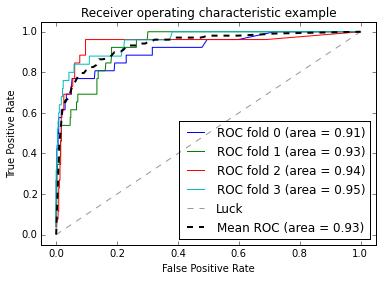

In [79]:
# Run classifier with cross-validation and plot ROC curves
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
X=np.array(X_train)
y=np.array(y_train)
cv = StratifiedKFold(y, n_folds=4)
classifier = RandomForestClassifier(n_estimators=2000,max_depth=20,min_samples_leaf=1)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (tran, tet) in enumerate(cv):
    probas_ = classifier.fit(X[tran], y[tran]).predict_proba(X[tet])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[tet], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [77]:
rand = RandomForestClassifier(n_estimators=2000,max_depth=25,min_samples_leaf=1)
#rand = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)
rand.fit(X_train[:1020],y_train[:1020])
prediction = rand.predict_proba(X_train[1020:])
prediction_train = rand.predict_proba(X_train[:1020])
print rand.feature_importances_
from sklearn import metrics
print metrics.roc_auc_score(y_train[1020:], prediction[:,1])

[ 0.03003936  0.02349534  0.00681784  0.02315462  0.05276163  0.0221416
  0.05666411  0.02658484  0.01241175  0.02375006  0.03608054  0.04729969
  0.03684101  0.04136164  0.03672241  0.03467065  0.0354463   0.02713634
  0.02911657  0.02556965  0.02200844  0.02469926  0.00767808  0.03053519
  0.0021508   0.          0.00595126  0.00393019  0.00365344  0.00244841
  0.00444305  0.00142002  0.          0.00032886  0.02467571  0.03302834
  0.02931082  0.04986241  0.04767112  0.0295186   0.04579737  0.0028227 ]
0.938087774295


In [72]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

train_r = train#[train['nbActions']>100]

X_train = train_r.drop(['bidder_id','outcome','payment_account','address'],axis=1)
y_train = train_r['outcome']

X_test = test.drop(['bidder_id','payment_account','address'],axis=1)

In [73]:
print X_train.columns.values
print X_test.columns.values

['nbActions' 'meanTimeResponse' 'minTimeResponse' 'maxTimeResponse'
 'meanBidValue' 'minBidValue' 'maxBidValue' 'nbAuctionsPlayed'
 'nbOfAuctionWon' 'nbOfTriple' 'res0' 'res1' 'res2' 'res3' 'res4' 'res5'
 'fftPower0' 'fftPower1' 'fftPower2' 'fftPower3' 'fftPower4' 'fftPower5'
 'median' 'max' 'jewelry' 'furniture' 'home goods' 'mobile'
 'sporting goods' 'office equipment' 'computers' 'books and music'
 'clothing' 'auto parts' 'nbCountry' 'nbIp' 'nbUrl' 'actionFromMain'
 'nbDevice' 'actionsRoboturl_flag' 'actionsRobotDevice_flag'
 'actionsRobotCountry_flag']
['nbActions' 'meanTimeResponse' 'minTimeResponse' 'maxTimeResponse'
 'meanBidValue' 'minBidValue' 'maxBidValue' 'nbAuctionsPlayed'
 'nbOfAuctionWon' 'nbOfTriple' 'res0' 'res1' 'res2' 'res3' 'res4' 'res5'
 'fftPower0' 'fftPower1' 'fftPower2' 'fftPower3' 'fftPower4' 'fftPower5'
 'median' 'max' 'jewelry' 'furniture' 'home goods' 'mobile'
 'sporting goods' 'office equipment' 'computers' 'books and music'
 'clothing' 'auto parts' 'nbCount

In [74]:
rand = RandomForestClassifier(n_estimators=1000,max_depth=25,min_samples_leaf=1)

#print cross_val_score(svm,X_train,y_train,cv=10).mean()
rand.fit(X_train,y_train)
prediction = rand.predict_proba(X_test)

In [797]:
test['prediction'] = prediction[:,1]

In [798]:
test[['bidder_id','prediction']].to_csv('submission.csv',index=False)

In [250]:
data_time_series = data[['bidder_id','timeSteps','auction']].drop_duplicates().groupby(['auction','timeSteps']).count()['bidder_id'].unstack()